<a href="https://colab.research.google.com/github/KevinrealG/Series_de_tiempo/blob/main/01_Time_Series_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Series de Tiempo

## Carga de Datos e Importando Librerias


In [1]:
import numpy as np
import pandas as pd
from time import time
from scipy.stats import spearmanr
from collections import OrderedDict

from scipy import stats
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip3 install aeon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 15.5 MB/s eta 0:00:00


In [4]:
import os
import aeon
from aeon.datasets import load_from_tsfile

In [5]:
# time series - statsmodels
from statsmodels.tsa.filters.hp_filter import hpfilter  # Hodrick Prescott filter for cyclic & trend separation
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
train_x, train_y = load_from_tsfile("/content/drive/MyDrive/Colab Notebooks/Time_Series/DodgerLoopDay_TRAIN.ts")
len(train_y)


78

## Explorando Dataset

In [ ]:
#Class 1: Sunday - Class 2: Monday - Class 3: Tuesday -
#Class 4: Wednesday - Class 5: Thursday - Class 6: Friday - Class 7: Saturday.

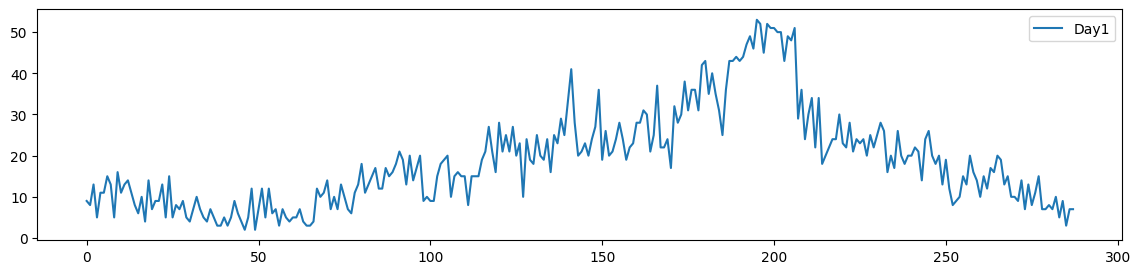

In [9]:
plt.figure(figsize=(14,3))
plt.plot(train_x[10][0],label="Day{}".format(train_y[10]))
plt.legend()
plt.show()

In [16]:
days = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
arrays = list(train_y)
data = pd.DataFrame({f'{days[0]}': train_x[1][0]})
for i in range(1,7):

    data1 = pd.DataFrame({f'{days[i]}':train_x[list(train_y).index(f'{i+1}')][0]})
    data = pd.concat([data, data1], axis=1)

In [17]:
data

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,12.0,9.0,3.0,5.0,7.0,9.0,16.0
1,9.0,5.0,10.0,4.0,3.0,6.0,20.0
2,11.0,6.0,3.0,6.0,6.0,15.0,14.0
3,7.0,4.0,5.0,8.0,11.0,10.0,14.0
4,12.0,4.0,1.0,2.0,8.0,12.0,9.0
...,...,...,...,...,...,...,...
283,9.0,6.0,7.0,11.0,6.0,18.0,11.0
284,7.0,2.0,1.0,12.0,9.0,18.0,18.0
285,10.0,2.0,4.0,8.0,5.0,16.0,12.0
286,4.0,4.0,9.0,3.0,16.0,13.0,12.0


In [18]:
# easy clean
data = data.fillna(0.5)

### Visualizando Series

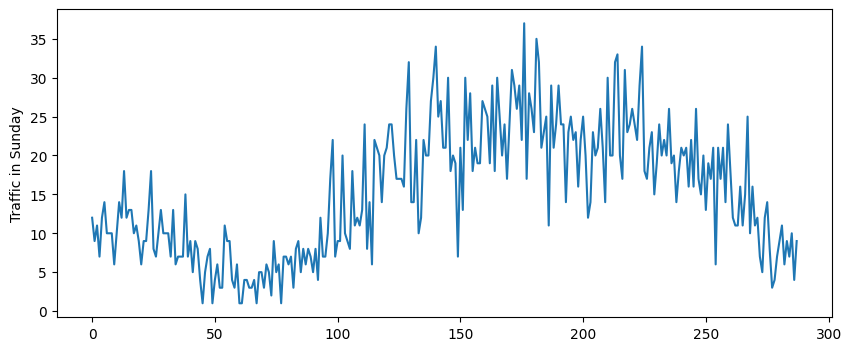

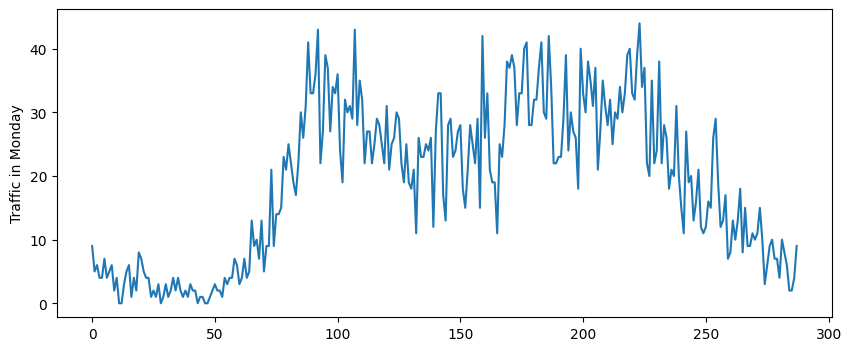

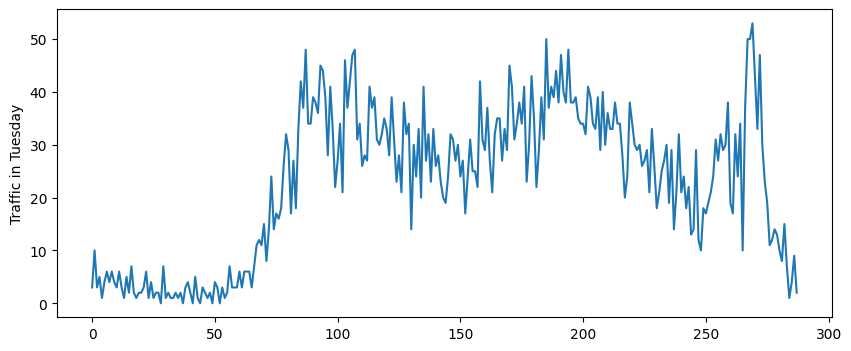

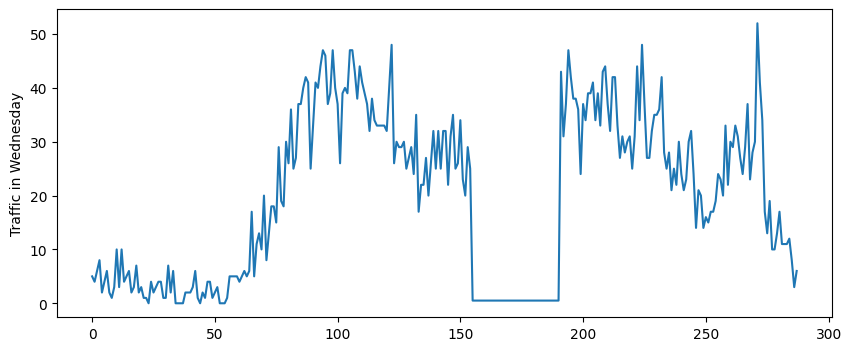

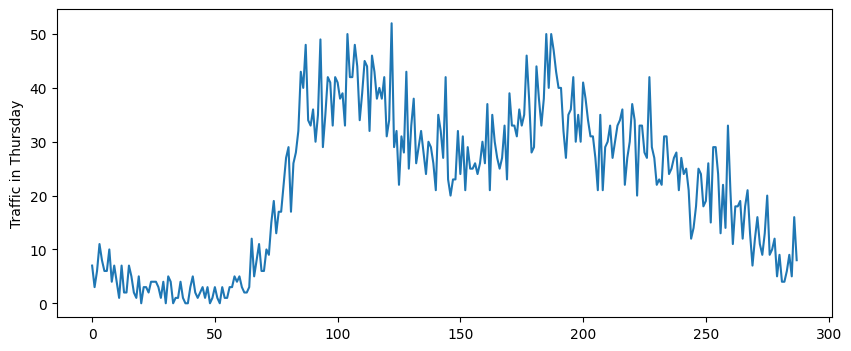

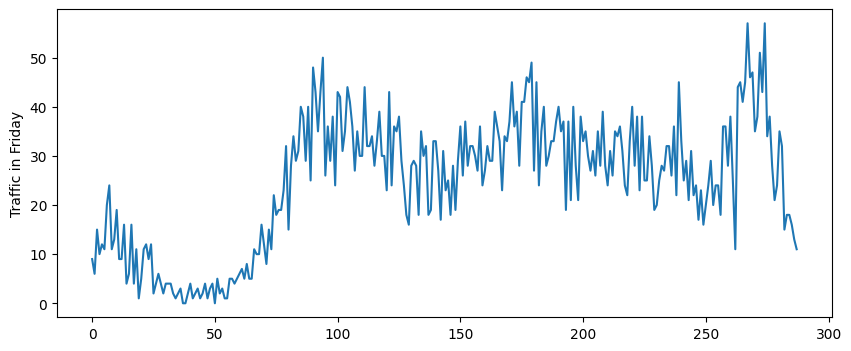

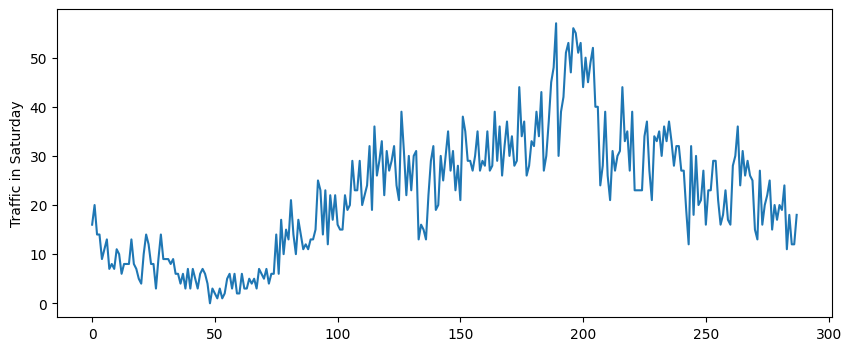

In [20]:
for day in days:

    plt.figure(figsize=(10,4))
    plt.plot(data[f'{day}'])
    plt.ylabel(f"Traffic in {day}")
    plt.show()

## Descomposición de Series

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL


<Figure size 1000x400 with 0 Axes>

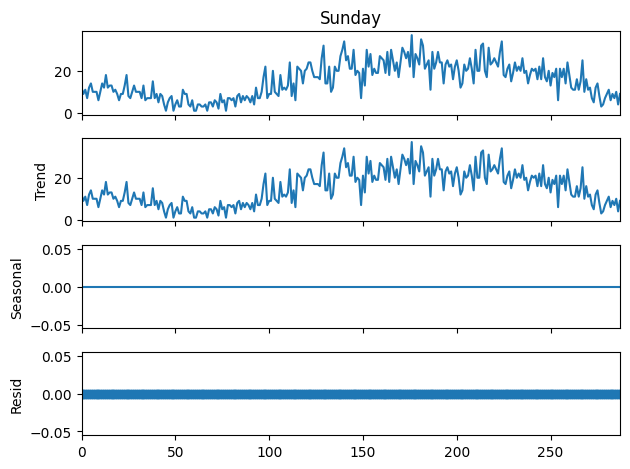

<Figure size 1000x400 with 0 Axes>

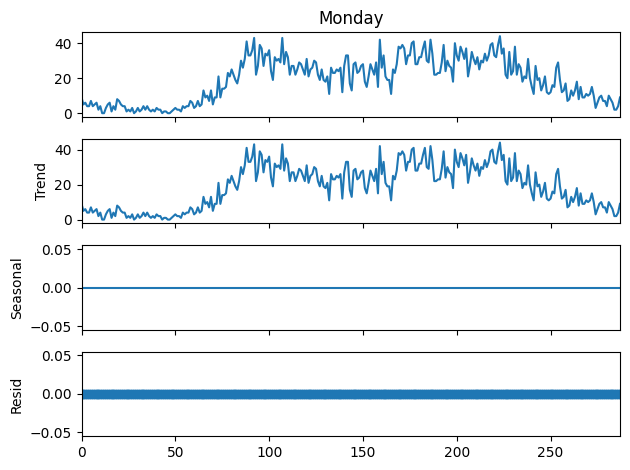

<Figure size 1000x400 with 0 Axes>

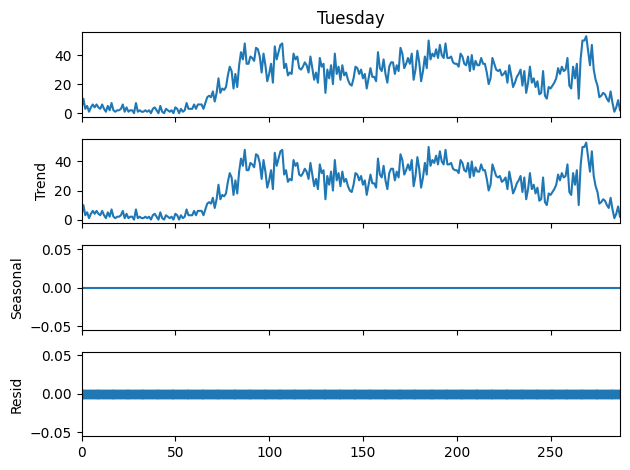

<Figure size 1000x400 with 0 Axes>

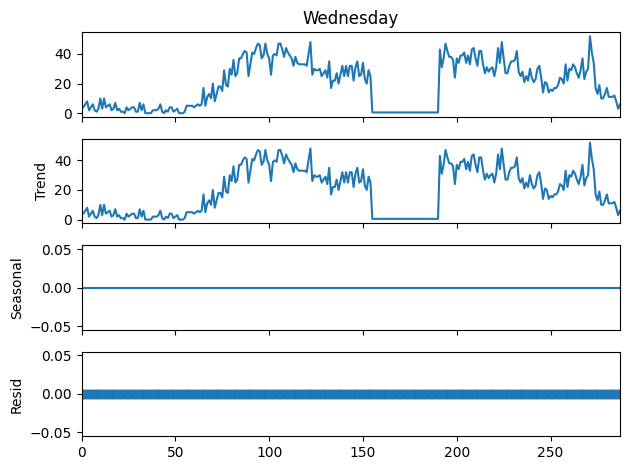

<Figure size 1000x400 with 0 Axes>

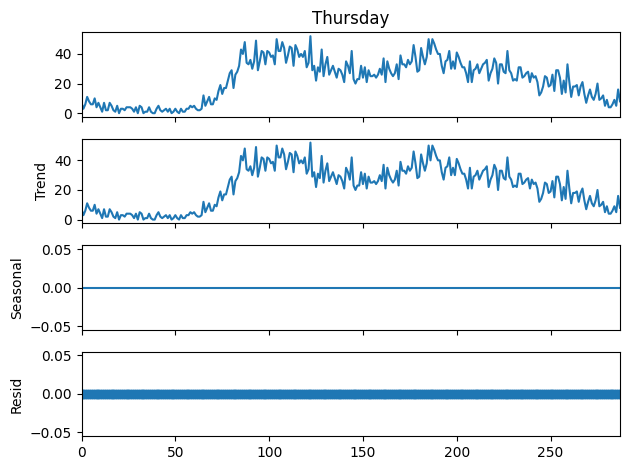

<Figure size 1000x400 with 0 Axes>

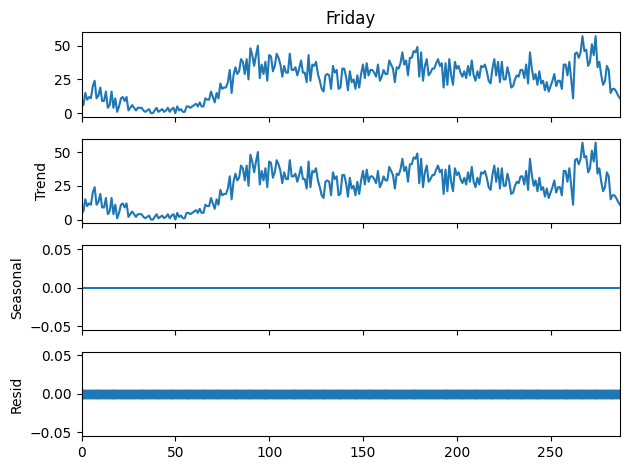

<Figure size 1000x400 with 0 Axes>

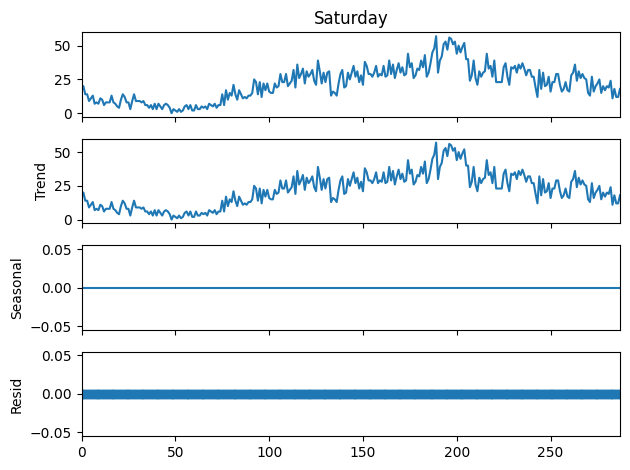

In [23]:
# descomposicón aditiva
for day in days:

    plt.figure(figsize=(10,4))

    result1 = seasonal_decompose(data[f'{day}'], model='additive', period=1)
    result1.plot()

    plt.show()

<Figure size 1000x400 with 0 Axes>

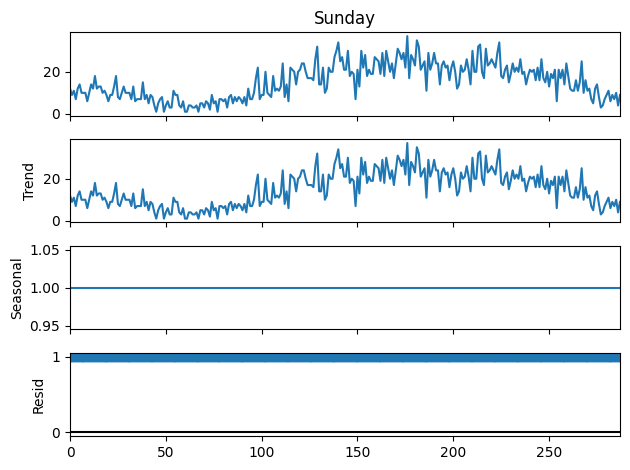

<Figure size 1000x400 with 0 Axes>

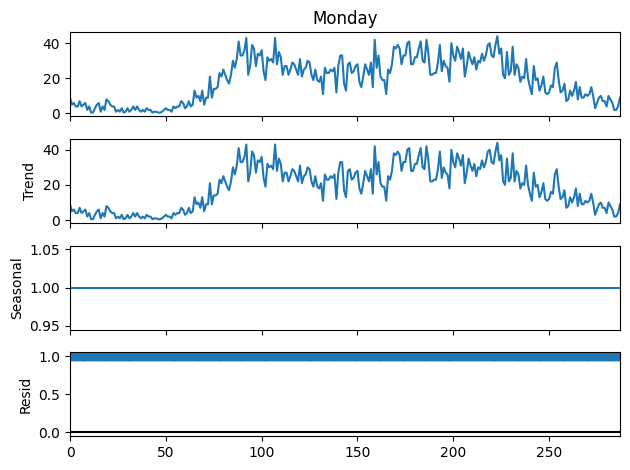

<Figure size 1000x400 with 0 Axes>

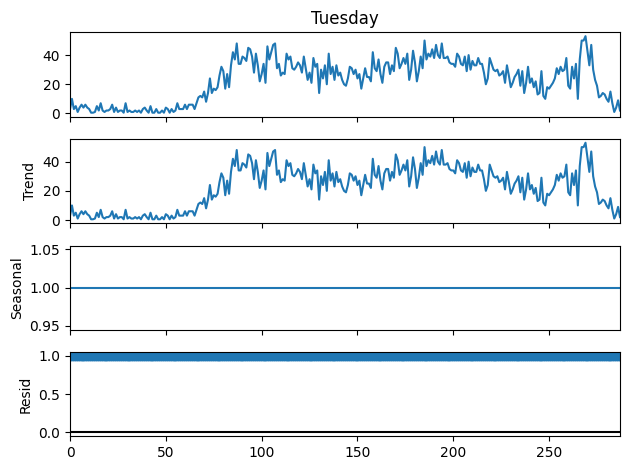

<Figure size 1000x400 with 0 Axes>

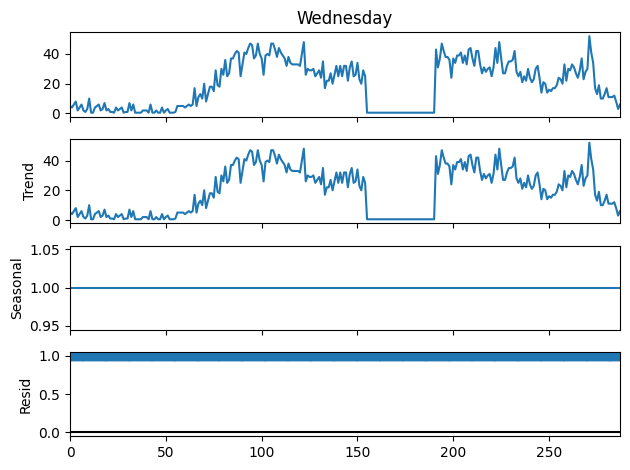

<Figure size 1000x400 with 0 Axes>

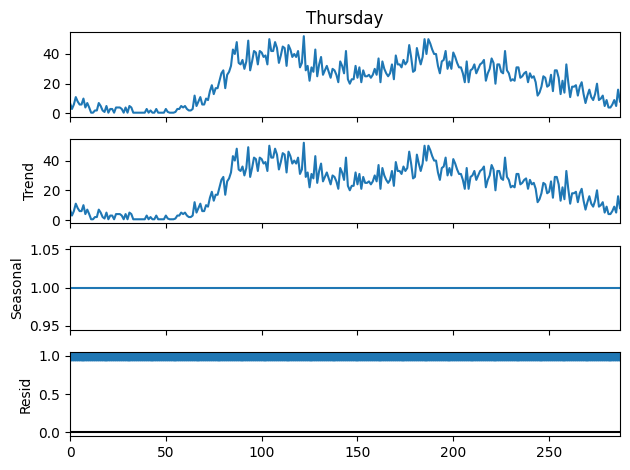

<Figure size 1000x400 with 0 Axes>

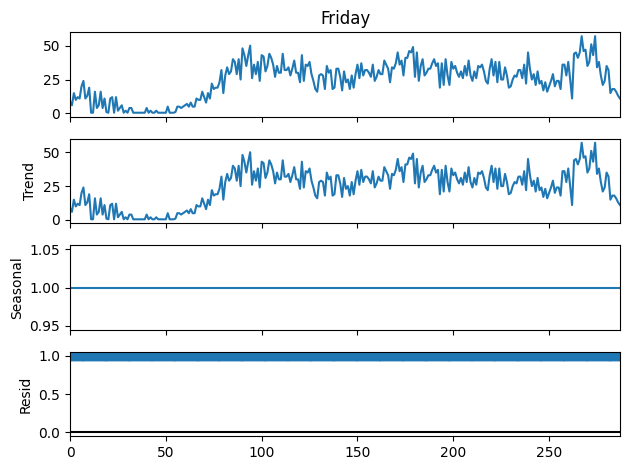

<Figure size 1000x400 with 0 Axes>

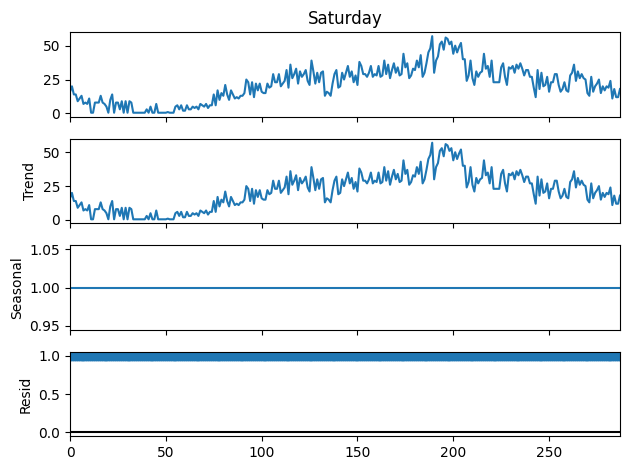

In [24]:
# Mulltiplicative descomposition
data_mul = data.copy()
for day in days:
    data_mul[data_mul[f'{day}']==0] = 0.5

    plt.figure(figsize=(10,4))


    result1 = seasonal_decompose(data_mul[f'{day}'], model='multiplicative', period=1)
    result1.plot()

    plt.show()

## Chequeando Estacionalidad

In [25]:
# creando función para perform prueba estadistica
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

#You can use the statsmodels library in Python to perform the Dickey-Fuller test for checking stationarity in a time series.
#Here's a simple code example to do that:
def dickey_fuller_test(time_series):
    # Perform the Dickey-Fuller test
    result = adfuller(time_series)
    # Extract the test results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'{key}: {value}')
    # Interpret the results
    if p_value <= 0.05:
        print("The time series is stationary (reject the null hypothesis)")
    else:
        print("The time series is non-stationary (fail to reject the null hypothesis)")
    return

In [30]:
# prompt: aplicar dickey_fuller_test a cada dia de data

for day in days:
    print('-'*20)
    print('-'*20)
    print(f'Test on  {day}')
    print('-'*20)


    dickey_fuller_test(data[f'{day}'])
    print('-'*20)
    print('-'*20)


--------------------
--------------------
Test on  Sunday
--------------------
ADF Statistic: -0.9445970740432472
p-value: 0.7729315683654336
Critical Values:
1%: -3.454355055831705
5%: -2.8721080938842976
10%: -2.572401325619835
The time series is non-stationary (fail to reject the null hypothesis)
--------------------
--------------------
--------------------
--------------------
Test on  Monday
--------------------
ADF Statistic: -1.4656624931734994
p-value: 0.5504241098659515
Critical Values:
1%: -3.4538376962008495
5%: -2.8718811911083093
10%: -2.5722803076202174
The time series is non-stationary (fail to reject the null hypothesis)
--------------------
--------------------
--------------------
--------------------
Test on  Tuesday
--------------------
ADF Statistic: -2.0924842799372585
p-value: 0.24754742999830376
Critical Values:
1%: -3.4535872903895797
5%: -2.871771355211212
10%: -2.5722217283277127
The time series is non-stationary (fail to reject the null hypothesis)
--------

## Chequeando auto-correlacion y lagtime

In [32]:
#To calculate auto-correlation and time lag for a time series, you can use the pandas library in Python.
#Here's a function that does just that:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
def plot_autocorrelation(day,time_series, alpha=0.05):
    """
    Calculate and plot autocorrelation for a time series.
    """
    n = len(time_series)
    max_lag = n // 2
    # Plot the autocorrelation using statsmodels' plot_acf
    # Plot the autocorrelation using statsmodels' plot_acf
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(time_series, alpha=alpha, ax=ax)
    plt.title(f'Autocorrelation Plot with Confidence Interval on {day}')
    plt.grid(True)
    plt.show()
    # Calculate the autocorrelation
    acf_result, _ = acf(time_series, nlags=len(time_series)-1, fft=False, alpha=alpha)
    # Find the lags with the highest autocorrelation
    max_autocorrelation = max(abs(acf_result))
    max_autocorrelation_lags = [i for i, autocorr in enumerate(acf_result) if abs(autocorr) == max_autocorrelation]
    print(f"Lags with the highest autocorrelation: {max_autocorrelation_lags}")
    return acf_result

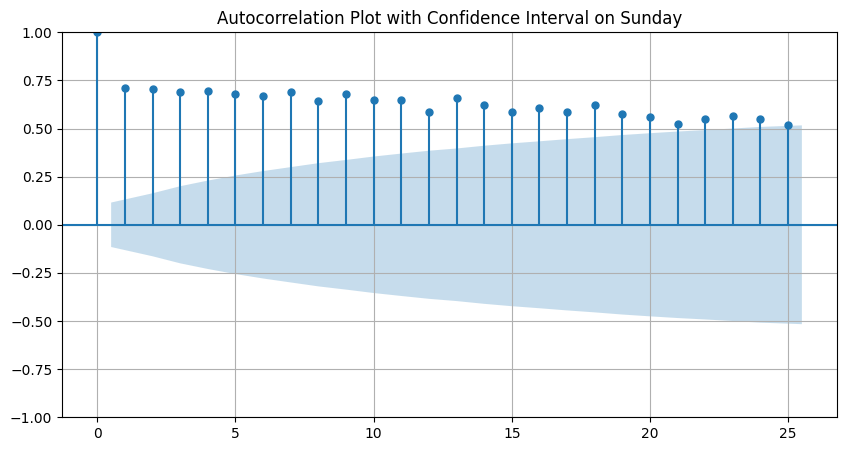

Lags with the highest autocorrelation: [0]


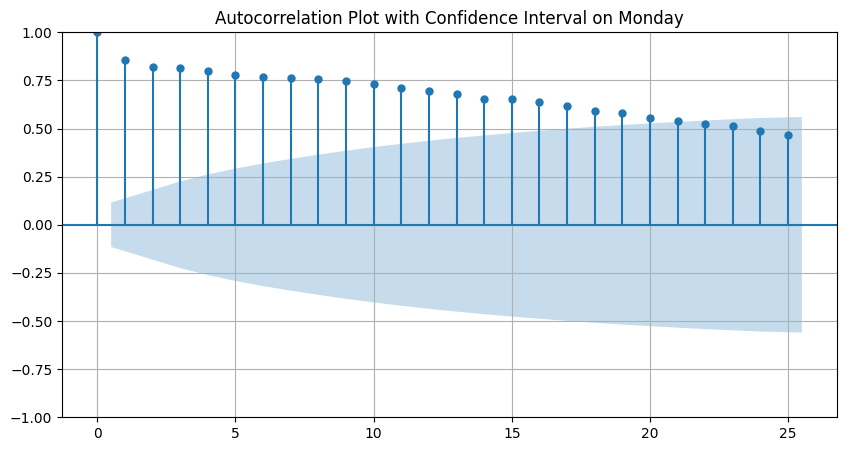

Lags with the highest autocorrelation: [0]


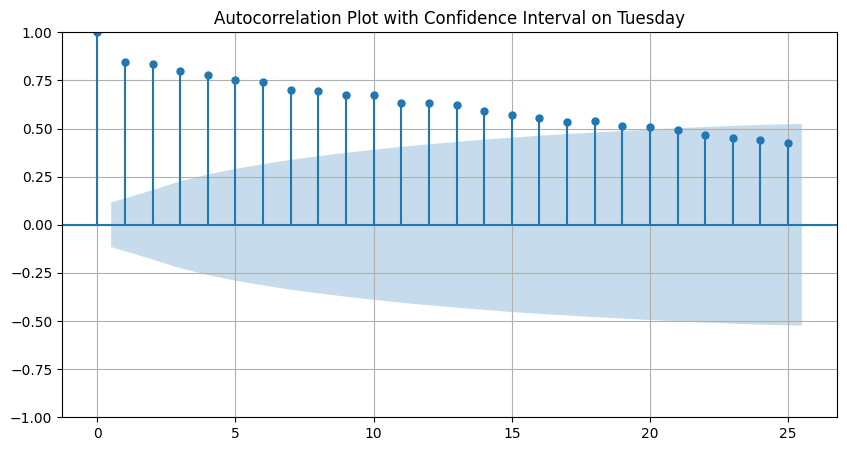

Lags with the highest autocorrelation: [0]


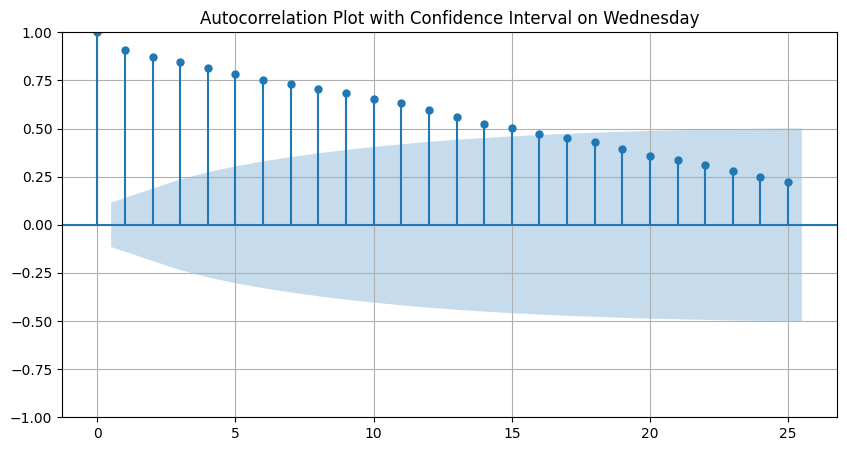

Lags with the highest autocorrelation: [0]


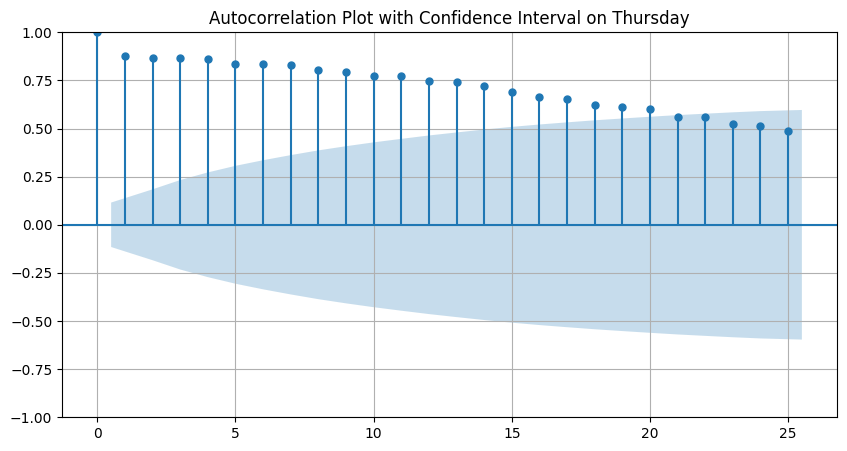

Lags with the highest autocorrelation: [0]


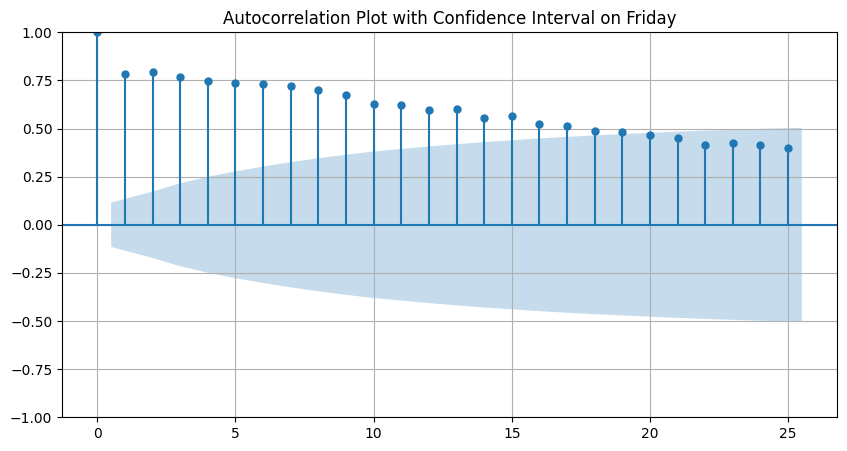

Lags with the highest autocorrelation: [0]


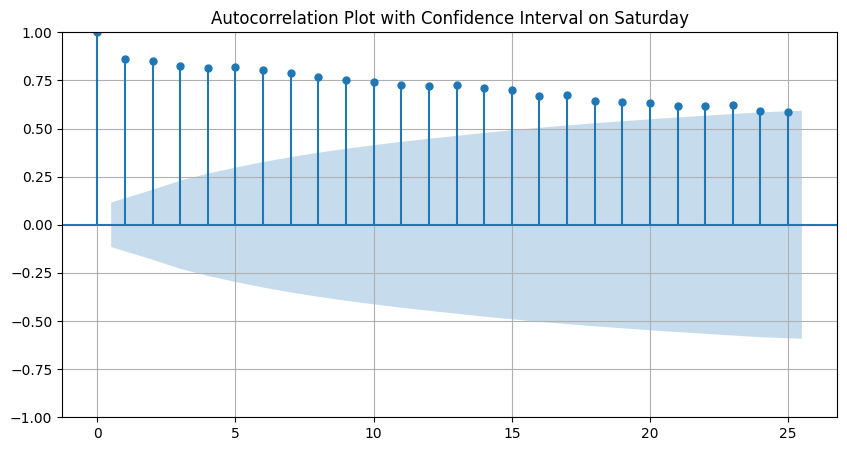

Lags with the highest autocorrelation: [0]


In [34]:
for day in days:


    plot_autocorrelation(day,data[f'{day}'])